In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target


/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(3.94838,-0.751182,'0'),
  Text(-3.48871,-1.66226,'1'),
  Text(0.347295,-1.01602,'2'),
  Text(0.122996,-1.97931,'3'),
  Text(-0.394561,2.23015,'4'),
  Text(0.485048,-0.477362,'5'),
  Text(0.813562,-0.111822,'6'),
  Text(-1.19259,2.43097,'7'),
  Text(-0.226532,-0.77895,'8'),
  Text(-0.775889,2.32642,'9')])

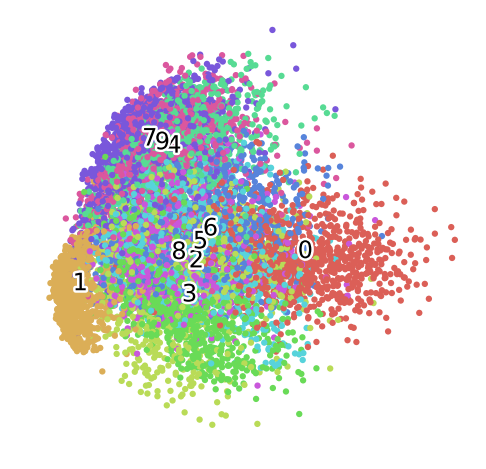

In [10]:
from sklearn.decomposition import PCA
index = np.random.permutation(X.shape[0])
X, y = X[index], y[index]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X[:10000])
fashion_scatter(pca_result,y[:10000])

(<Figure size 576x576 with 1 Axes>,
 [Text(47.0212,52.3463,'0'),
  Text(21.5046,-56.2948,'1'),
  Text(55.2868,-15.7592,'2'),
  Text(25.5258,11.0611,'3'),
  Text(-59.2821,-1.47192,'4'),
  Text(-7.48567,24.9994,'5'),
  Text(-12.8418,63.357,'6'),
  Text(-36.5288,-44.8424,'7'),
  Text(6.28355,-16.3479,'8'),
  Text(-42.0763,0.253069,'9')])

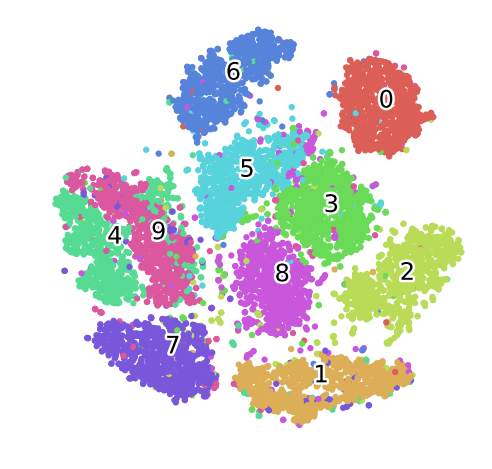

In [12]:
from sklearn.manifold import TSNE
fashion_tsne = TSNE(random_state=0).fit_transform(X[:10000])
fashion_scatter(fashion_tsne,y[:10000])

In [9]:
high_x = np.load('result/test_outputs.npy')
high_y = np.load('result/test_y.npy')

In [12]:
np.unique(high_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

(<Figure size 576x576 with 1 Axes>,
 [Text(0.0102457,-0.00774723,'0'),
  Text(-0.313336,-0.0416753,'1'),
  Text(0.0101359,-0.00776551,'2'),
  Text(0.0102014,-0.00778516,'3'),
  Text(0.0102232,-0.00785478,'4'),
  Text(0.0101732,-0.00782642,'5'),
  Text(0.0102154,-0.00786917,'6'),
  Text(0.539191,0.0478486,'7'),
  Text(0.0101536,-0.00783415,'8'),
  Text(0.0102139,-0.0079251,'9')])

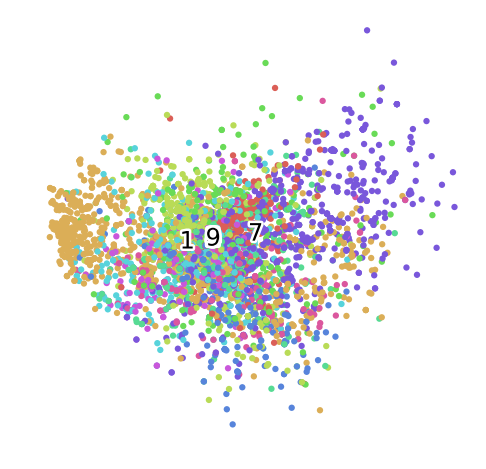

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_result = pca.fit_transform(high_x)
pca_data = np.hstack([pca_result[:,1:2], pca_result[:, 4:5]])

fashion_scatter(pca_data,high_y)

(<Figure size 576x576 with 1 Axes>,
 [Text(0.000612351,0.0127442,'0'),
  Text(-0.0193682,-0.00189269,'1'),
  Text(0.000610514,0.0127422,'2'),
  Text(0.000611623,0.0127442,'3'),
  Text(0.000611559,0.00943711,'4'),
  Text(0.00061137,0.0127102,'5'),
  Text(0.00061201,0.0127435,'6'),
  Text(0.00081823,0.00470348,'7'),
  Text(0.000611517,0.0127443,'8'),
  Text(0.000612048,0.00885019,'9')])

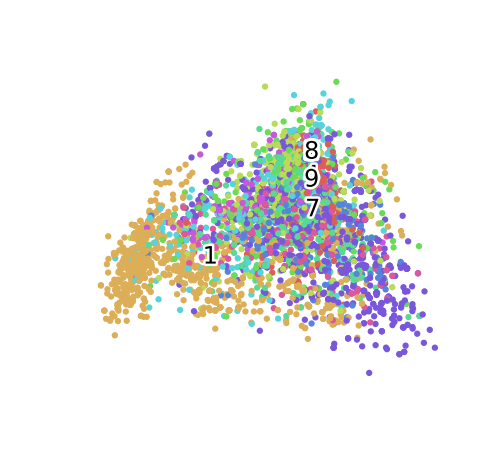

In [54]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=4)
ica_result = ica.fit_transform(high_x)
ica_data = np.hstack([ica_result[:,1:2], ica_result[:, 4:5]])

fashion_scatter(ica_data[:,2:],high_y)

In [22]:
from sklearn.manifold import UMAP
fashion_tsne = UMAP(random_state=0).fit_transform(high_x)
fashion_scatter(fashion_tsne,high_y)

ImportError: cannot import name 'UMAP'

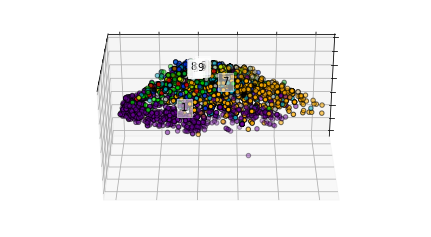

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[10, 0], [0, 0], [1, -1]]
iris = datasets.load_iris()
X = high_x
y = high_y

fig = plt.figure(1, figsize=(6, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 4, .95, 1], elev=120, azim=0)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('0',0),('1',1),('2',2),('3',3),('4',5),('5',5),('6',6),('7',7),('8',8),('9',9),]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [47]:
square_x =  high_x.reshape((10000, 10, 10))

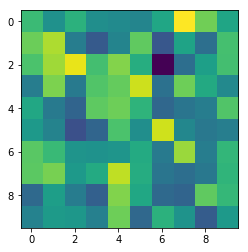